# FTCS test (part b)

Short sanity-check of explicit FTCS for the 1D heat equation (part b). Reuses helpers from `src` (`ftcs_solution`, `g_analytic`, `save_fig`).


In [1]:
import sys, os
from time import perf_counter

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src import ftcs_solution, g_analytic, save_fig
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Parameters for quick sweep
# Two time snapshots to compare: early (curved) and later (near steady)
t1 = 0.05
t2 = 0.50
# Spatial step sizes to test
# Note: grid is built as linspace(0, 1, n_points) so actual dx ~= 1/(N-1)
delta_x_list = [0.1, 0.01]
# Times we evaluate
m_times = np.array([0.0, t1, t2])


In [3]:
results = []
for dx in delta_x_list:
    # Build spatial grid with spacing close to dx
    n_points = int(round(1.0 / dx)) + 1
    x = np.linspace(0.0, 1.0, n_points)
    # Run FTCS and measure wall time
    start = perf_counter()
    ftcs_grid = ftcs_solution(x, m_times)
    elapsed = perf_counter() - start
    # Extract snapshots
    ftcs_t1 = ftcs_grid[:, 1]
    ftcs_t2 = ftcs_grid[:, -1]
    # Analytical solutions for the same times
    exact_t1 = np.exp(-np.pi**2 * t1) * np.sin(np.pi * x)
    exact_t2 = np.exp(-np.pi**2 * t2) * np.sin(np.pi * x)
    # Max absolute error at each time
    err_t1 = float(np.max(np.abs(ftcs_t1 - exact_t1)))
    err_t2 = float(np.max(np.abs(ftcs_t2 - exact_t2)))
    results.append({
        "dx": dx,
        "x": x,
        "t1": err_t1,
        "t2": err_t2,
        "ftcs_t1": ftcs_t1,
        "ftcs_t2": ftcs_t2,
        "exact_t1": exact_t1,
        "exact_t2": exact_t2,
        "time_s": elapsed,
    })
    print(f"dx={dx}: max error @ t1={err_t1:.3e}, @ t2={err_t2:.3e}, runtime={elapsed*1e3:.2f} ms")


dx=0.1: max error @ t1=5.069e-03, @ t2=5.753e-04, runtime=0.37 ms
dx=0.01: max error @ t1=4.957e-05, @ t2=5.837e-06, runtime=22.60 ms


Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test_ftcs_t1_t2_dx_panels_vertical.pdf


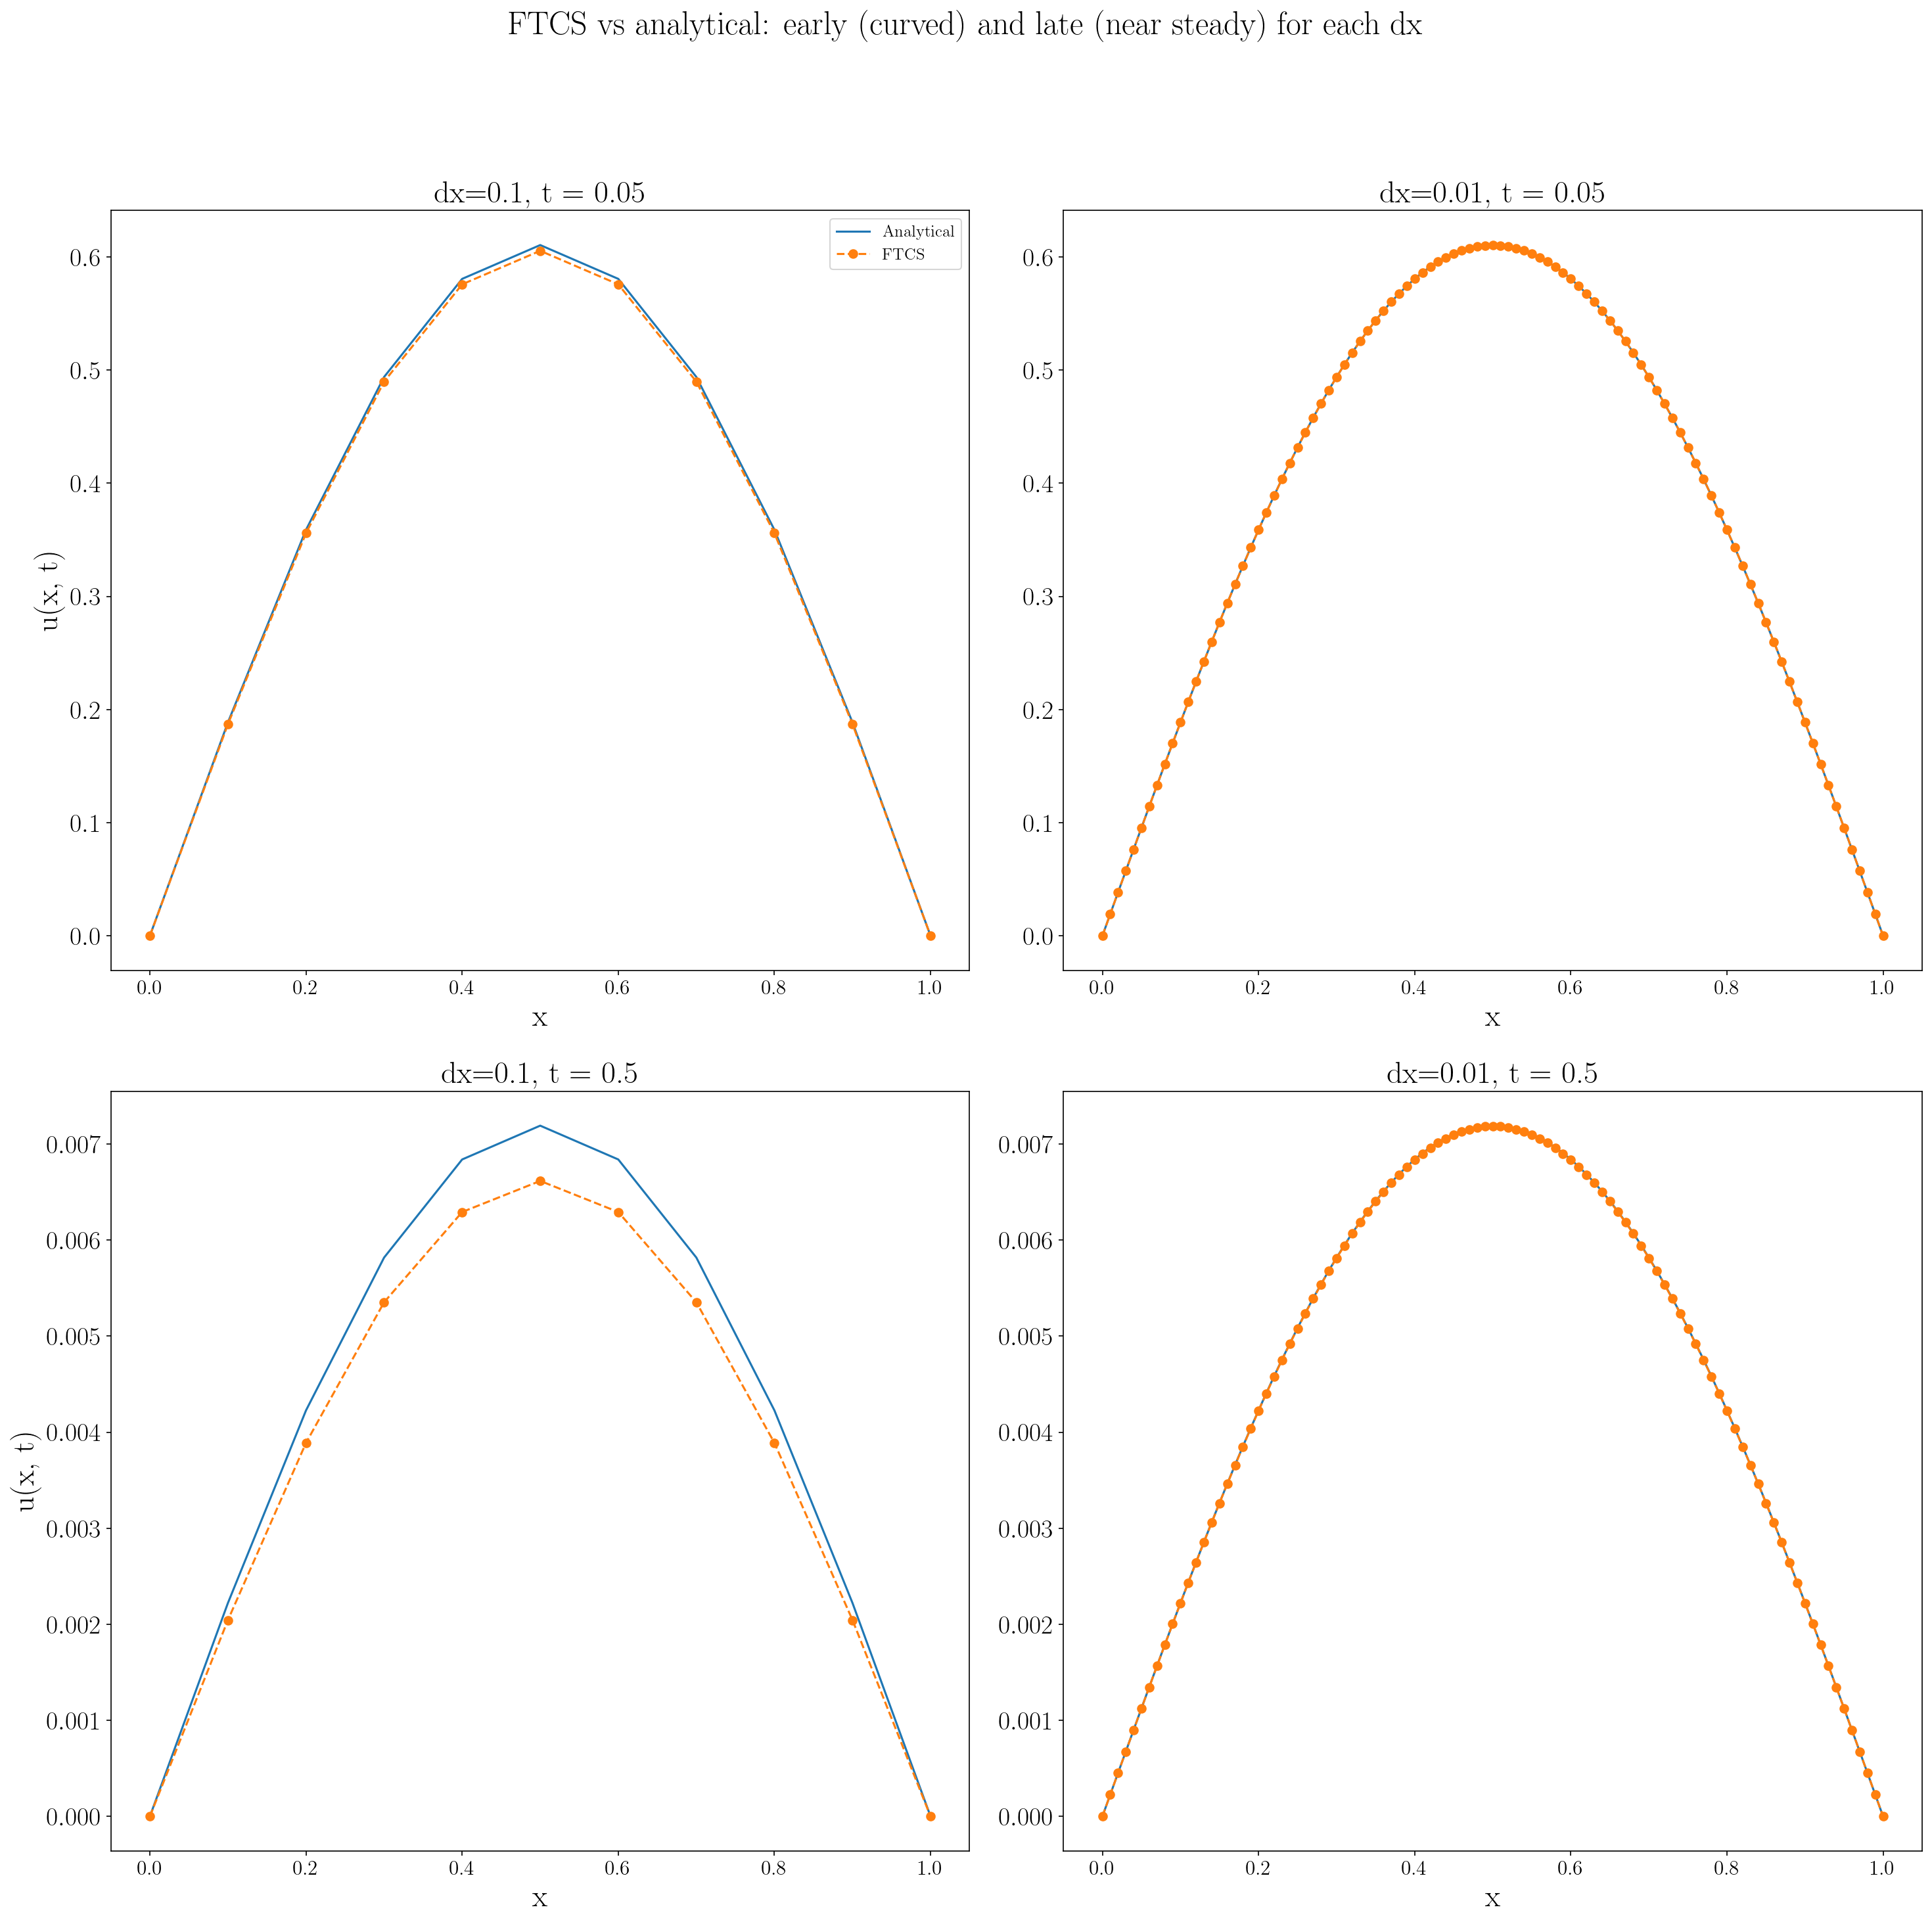

In [8]:
# Two rows (t1, t2) by number of dx columns
fig, axes = plt.subplots(2, len(results), figsize=(20, 20), sharey=False, sharex=False)

snapshots = [(1, f"t = {t1}"), (2, f"t = {t2}")]
for col_idx, res in enumerate(results):
    dx = res['dx']
    for row_idx, (t_idx, t_label) in enumerate(snapshots):
        ax = axes[row_idx, col_idx]
        ftcs = res['ftcs_t1'] if t_idx == 1 else res['ftcs_t2']
        exact = res['exact_t1'] if t_idx == 1 else res['exact_t2']
        ax.plot(res['x'], exact, linestyle='-', label='Analytical')
        ax.plot(res['x'], ftcs, marker='o', linestyle='--', label='FTCS')
        ax.set_title(f'dx={dx}, {t_label}')
        ax.set_xlabel('x')
        if col_idx == 0:
            ax.set_ylabel('u(x, t)')
        if row_idx == 0 and col_idx == 0:
            ax.legend()

plt.suptitle('FTCS vs analytical: early (curved) and late (near steady) for each dx')
plt.tight_layout(rect=[0, 0, 1, 0.94])
save_fig('test_ftcs_t1_t2_dx_panels_vertical')
plt.show()


In [5]:
# Timing summary per dx
for res in results:
    print(f"dx={res['dx']}: runtime = {res['time_s']*1e3:.2f} ms")


dx=0.1: runtime = 0.37 ms
dx=0.01: runtime = 22.60 ms
